In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Load dataset

In [2]:
ds = datasets.load_iris()
ds.feature_names
df=pd.DataFrame(data = ds.data, columns= ds.feature_names)
df['species']= [ds.target_names[i] for i in ds.target]
df.head()
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [3]:
print(ds.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Exploring Dataset

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
pd.DataFrame(data= df.nunique(), columns= ['Number of unique values'])

,Number of unique values
sepal length (cm),35
sepal width (cm),23
petal length (cm),43
petal width (cm),22
species,3


In [26]:
def value_counts(df, columns, n):
    return pd.DataFrame(df[col].value_counts()).head(n)

In [30]:
for col in df.columns:
    print(value_counts(df, col, 5))
    print(25 * '*')

                   count
sepal length (cm)       
5.0                   10
5.1                    9
6.3                    9
5.7                    8
6.7                    8
*************************
                  count
sepal width (cm)       
3.0                  26
2.8                  14
3.2                  13
3.4                  12
3.1                  11
*************************
                   count
petal length (cm)       
1.4                   13
1.5                   13
5.1                    8
4.5                    8
1.6                    7
*************************
                  count
petal width (cm)       
0.2                  29
1.3                  13
1.8                  12
1.5                  12
1.4                   8
*************************
            count
species          
setosa         50
versicolor     50
virginica      50
*************************


## Visualization with pairplot

C:\Users\ebsor\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


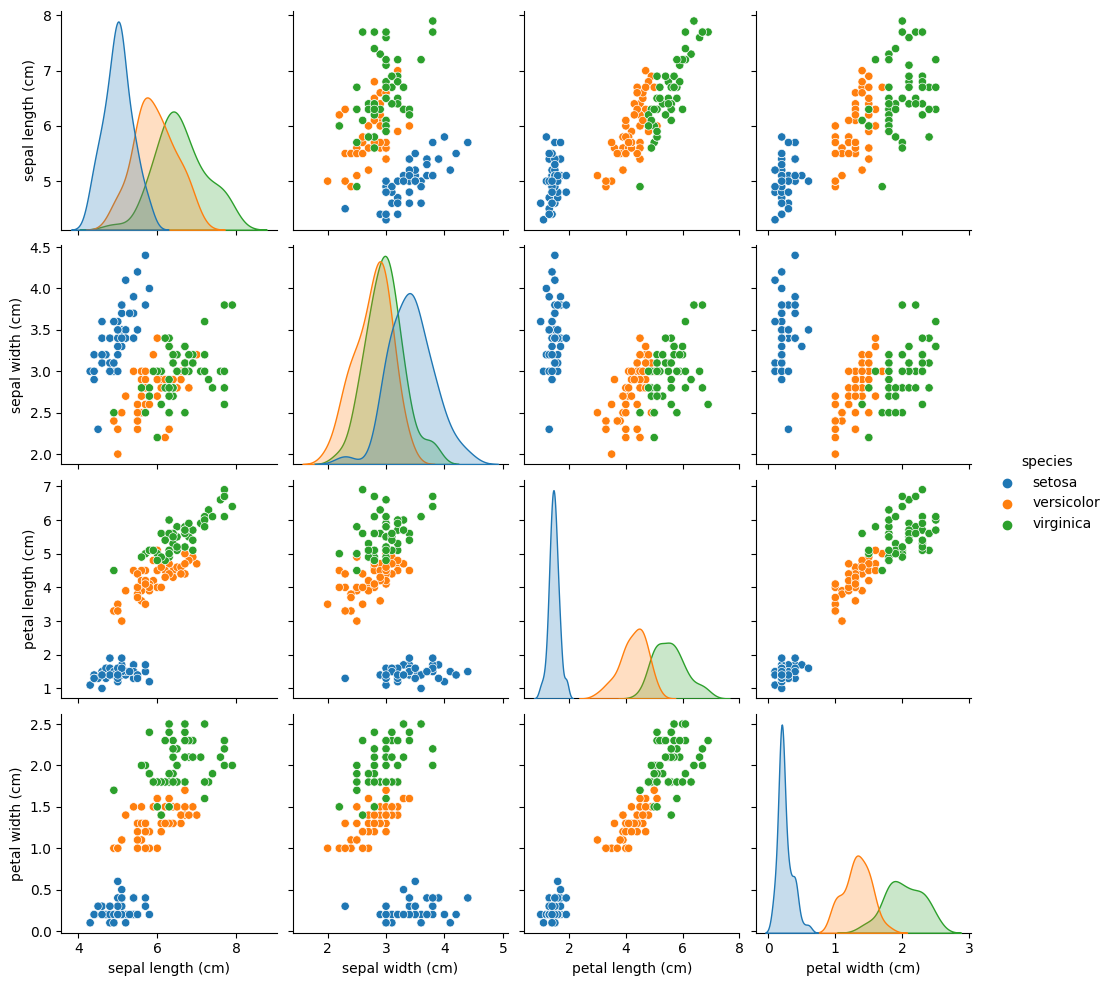

In [5]:
grid= sns.pairplot(data= df, vars= df.columns[0:4], hue= 'species')

C:\Users\ebsor\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


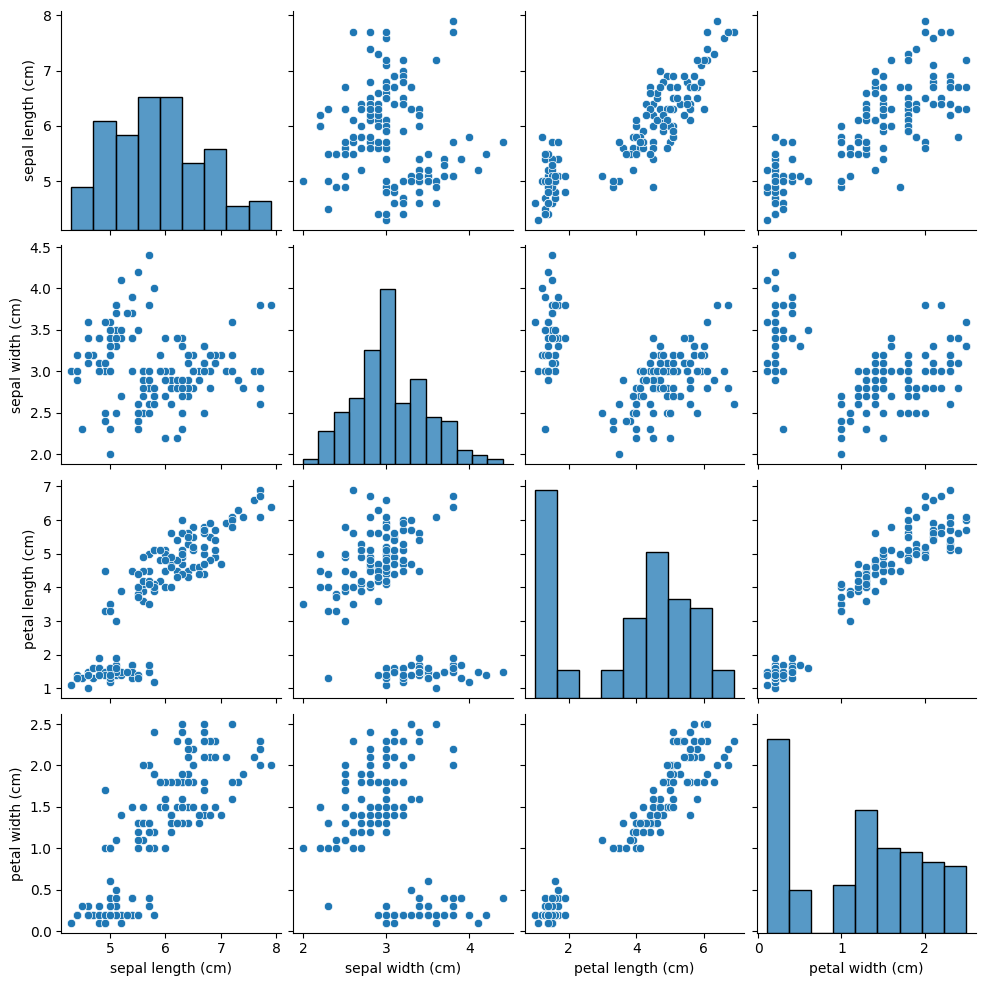

In [6]:
grid= sns.pairplot(data= df, vars= df.columns[0:4])

### result:
- If you do not know the number of clusters in advance, each scatter plot appears that there may be only two distinct clusters.

# Binary Classification

In [4]:
X= ds.data
y= ds.target
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.7, random_state=42)

LRmodel= LogisticRegression()
LRmodel.fit(X_train, y_train)
y_pred= LRmodel.predict(X_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

1.0


# Multiclass classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
ds = datasets.load_iris()
# df=pd.DataFrame(data = ds.data, columns= ds.feature_names)
# df['target']= ds.target

df= pd.DataFrame(data= np.c_[ds['data'], ds['target']], columns= ds['feature_names'] + ['target'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
X= ds.data
y= ds.target
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.2, random_state=42)

LRmodel= LogisticRegression()
LRmodel.fit(X_train, y_train)
y_pred= LRmodel.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(f1_score(y_test, y_pred, average='micro'))
print(confusion_matrix(y_test, y_pred))

[[43  0  0]
 [ 0 36  3]
 [ 0  1 37]]


# Decision tree classifier

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [12]:
X= ds.data
y= ds.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.6)

model= DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print(f'Confusion_matrix: {confusion_matrix(y_test, y_pred)}')
print(f'Accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred, average="micro")}')
print(f'classification_ report: {classification_report(y_test, y_pred)}')

Confusion_matrix: [[26  0  0]
 [ 0 18  1]
 [ 0  1 14]]
Accuracy_score: 0.9666666666666667
f1_score: 0.9666666666666667
classification_ report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



# Unsupervised Machine Learning

## Modeling KMeans estimator Clustering

In [7]:
from sklearn.cluster import KMeans

In [29]:
kmeans= KMeans(n_clusters= 3, random_state= 11)
X= ds.data
kmeans.fit(X)


C:\Users\ebsor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=11)

In [30]:
kmeans.labels_[0:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [31]:
kmeans.labels_[50:100]

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [32]:
kmeans.labels_[100:150]

array([2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0])

In [18]:
kmeans2= KMeans(n_clusters= 2, random_state= 11)
X= ds.data
kmeans2.fit(X)
print(kmeans2.labels_[0:50])
print(kmeans2.labels_[50:150])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\ebsor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Dimensionality Reduction

In [19]:
from sklearn.decomposition import PCA

In [23]:
pca= PCA(n_components= 2, random_state= 11)
pca.fit(X)
X_pca= pca.transform(X)

In [25]:
df_pca= pd.DataFrame(data= X_pca, columns= ['pca1', 'pca2'])
df_pca['species']= ds.target
df_pca.tail()

,pca1,pca2,species
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2
149,1.390189,-0.282661,2


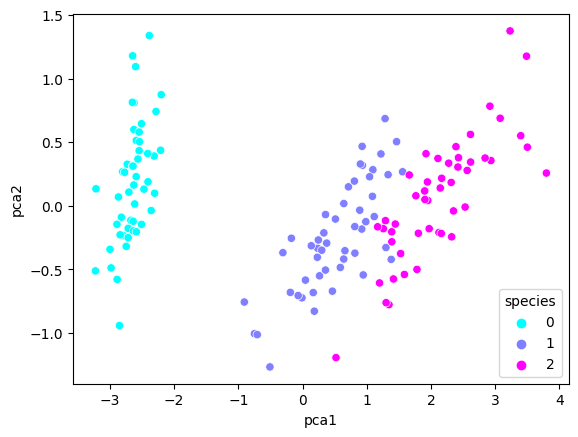

In [28]:
axes= sns.scatterplot(data= df_pca, x= 'pca1', y= 'pca2', hue= 'species', legend= 'brief' , palette= 'cool') 

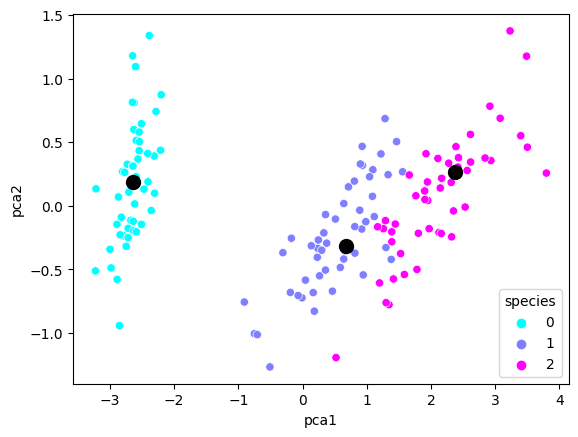

In [41]:
axes= sns.scatterplot(data= df_pca, x= 'pca1', y= 'pca2', hue= 'species', legend= 'brief' , palette= 'cool') 
Iris_centers= pca.transform(kmeans.cluster_centers_)
dots= plt.scatter(Iris_centers[:, 0], Iris_centers[:, 1], c='k', s=100)

In [36]:
print(Iris_centers)

[[ 0.67566229 -0.31520477]
 [-2.64241546  0.19088505]
 [ 2.37446608  0.26311694]]


## Choosing the Best Clustering Estimator

In [49]:
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, SpectralClustering

In [50]:
estimators= {
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'KMeans': KMeans(n_clusters= 3),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters= 3),
    'SpectralClustering': SpectralClustering(n_clusters= 3)
}

In [56]:
for name, estimator in estimators.items():
    estimator.fit(ds.data)
    print(f'Estimator name: {name}')
    for i in range(0, 101, 50):
        labels, counts= np.unique(estimator.labels_[i:i+50], return_counts= True)
        print(f'{i} - {i+50}:')
        for label, count in zip(labels, counts):
            print(f"    label= {label},  count= {count}")
    print( 30* '*')

Estimator name: DBSCAN
0 - 50:
    label= -1,  count= 1
    label= 0,  count= 49
50 - 100:
    label= -1,  count= 6
    label= 1,  count= 44
100 - 150:
    label= -1,  count= 10
    label= 1,  count= 40
******************************
Estimator name: MeanShift
0 - 50:
    label= 1,  count= 50
50 - 100:
    label= 0,  count= 49
    label= 1,  count= 1
100 - 150:
    label= 0,  count= 50
******************************
Estimator name: KMeans
0 - 50:
    label= 0,  count= 50
50 - 100:
    label= 1,  count= 2
    label= 2,  count= 48
100 - 150:
    label= 1,  count= 36
    label= 2,  count= 14
******************************
Estimator name: AgglomerativeClustering
0 - 50:
    label= 1,  count= 50
50 - 100:
    label= 0,  count= 49
    label= 2,  count= 1
100 - 150:
    label= 0,  count= 15
    label= 2,  count= 35
******************************
Estimator name: SpectralClustering
0 - 50:
    label= 2,  count= 50
50 - 100:
    label= 1,  count= 50
100 - 150:
    label= 0,  count= 35
    label= 

C:\Users\ebsor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
